In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
from joblib import dump, load

In [156]:
df = pd.read_csv("Airlines.csv")

In [157]:
df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [158]:
df.tail()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1
539382,539383,US,1442,LAX,PHL,5,1439,301,1


In [159]:
df.drop(['id'], axis = 1, inplace = True)

# Removing Duplicates and handling null values

In [160]:
#df.drop_duplicates(inplace = True)

In [161]:
df.describe()

,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,2427.928630,3.929668,802.728963,132.202007,0.445442
std,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,712.000000,2.000000,565.000000,81.000000,0.000000
50%,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 32.9+ MB


In [163]:
df.dropna(how = 'any', axis = 0, inplace = True)

No null values remaining, so we can move on to the next step, dealing with Outliers.

# Outliers

While going through the dataset, one can observe that there are certain length values that are 0, which is an anomaly, and hence will be dropped as an outlier, assuming it to be a human error while enetering the data.

In [164]:
print("The number of length=0 tuples are : ", len(df[df["Length"]==0]))
df.drop(df[df["Length"]==0].index, inplace = True)
print("Dropped")

The number of length=0 tuples are :  4
Dropped


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539379 entries, 0 to 539382
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539379 non-null  object
 1   Flight       539379 non-null  int64 
 2   AirportFrom  539379 non-null  object
 3   AirportTo    539379 non-null  object
 4   DayOfWeek    539379 non-null  int64 
 5   Time         539379 non-null  int64 
 6   Length       539379 non-null  int64 
 7   Delay        539379 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 37.0+ MB


Since I am not privy to the measurement standards used for the dataset, as this information was not available, I am not in a position to make any well-informed assumptions about the observations represented by the data and its distribution.

Hence, I will avoid removing any additional data basing it as an outlier, and accepting it as part of the natural distribution from which the data was collected and which the data represents.


# Visualizations and Inferences

We will create two new dataframes, one containing all the data in our feature columns, and the other to store the corresponding data in our target column, "Delay", which has binary categorical data, represented by 1's and 0's.

In [166]:
x_df = df.drop(["Delay"], axis = 1)
y_df = df["Delay"]

Let's just take a peek at the number of unique values in each category.

In [167]:
for col in x_df.columns:
  print(f"{col}: {x_df[col].nunique()}")

Airline: 18
Flight: 6585
AirportFrom: 293
AirportTo: 293
DayOfWeek: 7
Time: 1131
Length: 425


Let's try and answer a few interesting questions about our data:


1. What source airports contribute more/less towards the delays ? 
2. On what day of the week are we more/less likely to see a delay ?
3. Which airline has the most delays ?



Before we answer the questions, we'll create two dataframes, one that only has delayed flights, and the other that has none.


In [168]:
df_delay = df[df["Delay"]==1]
df_no_delay = df[df["Delay"]==0]

print(df_delay.shape)
print(df_no_delay.shape)

(240263, 8)
(299116, 8)


*Question 1: What source airports contribute more/less towards the delays ?*

(I will just be considering the top 10 for each)

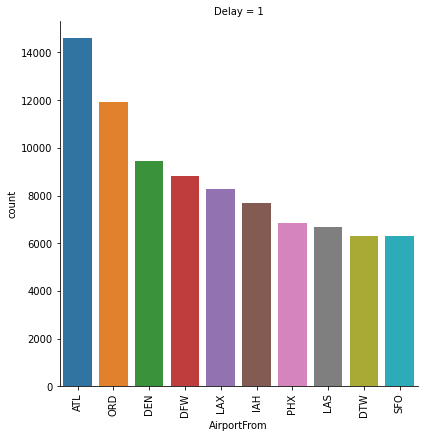

In [169]:
g = sns.catplot(x="AirportFrom", col="Delay",
                data=df_delay, kind="count",
                height=6,  order = df_delay['AirportFrom'].value_counts()[:10].index.tolist())
g.set_xticklabels(rotation = 90)
#g.savefig("delay_counts_v_AirportFrom")

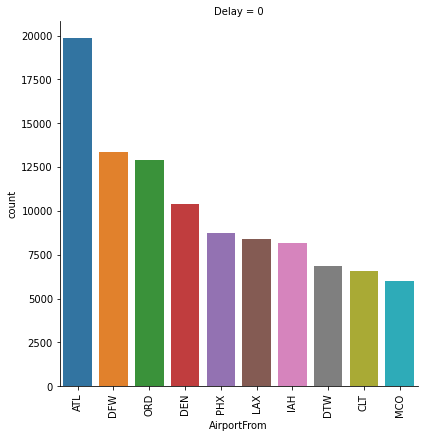

In [170]:
g = sns.catplot(x="AirportFrom", col="Delay",
                data=df_no_delay, kind="count",
                height=6,  order = df_no_delay['AirportFrom'].value_counts()[:10].index.tolist())
g.set_xticklabels(rotation = 90)
g.savefig("NoDelay_counts_v_AirportFrom")

*Question 2: On what day of the week are we more/less likely to see a delay ?*

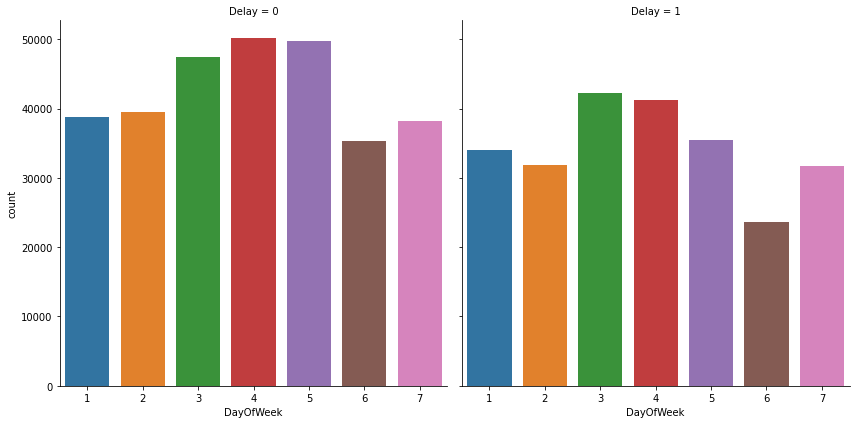

In [171]:
g = sns.catplot(x="DayOfWeek", col="Delay",
                data=df, kind="count",
                height=6)
g.savefig("dayOfWeek_v_count")

*Question 3: Which airline has the most delays ?*

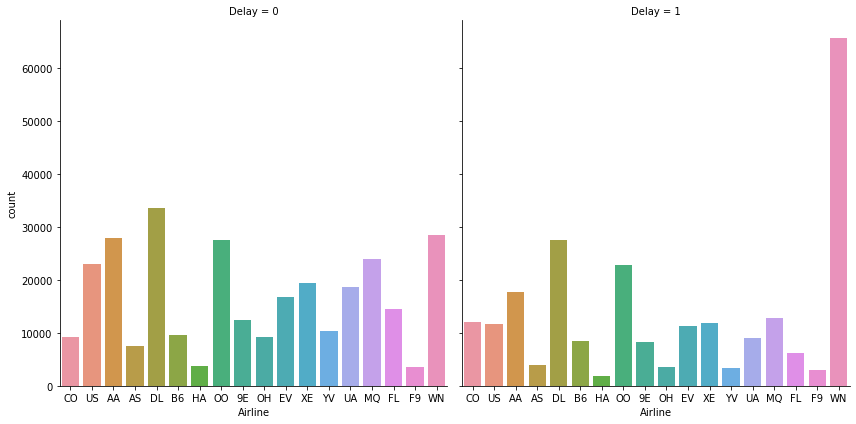

In [172]:
g = sns.catplot(x="Airline", col="Delay",
                data=df, kind="count",
                height=6)
g.savefig("counts_v_Airline")

Let's take a look into which airline and departure airport pairing results in the most delays.


In [173]:
grouped_df = df_delay.groupby(['Airline', 'AirportFrom']).size().reset_index(name="Count").sort_values("Count", ascending = False)
print(grouped_df[:10])

     Airline AirportFrom  Count
361       DL         ATL   7173
139       AA         DFW   5590
1243      WN         LAS   4874
1251      WN         MDW   4848
320       CO         IAH   4134
478       EV         ATL   4106
1264      WN         PHX   3681
1225      WN         BWI   3676
1150      US         CLT   3160
1333      XE         IAH   3063


Also, let's find the top 10 airport pairings with respect to delayed flights.

In [174]:
grouped_df_air_pairs = df_delay.groupby(['AirportFrom', 'AirportTo']).size().reset_index(name="Count").sort_values("Count", ascending = False)
print(grouped_df_air_pairs[:10])

     AirportFrom AirportTo  Count
2191         LAX       SFO    598
3717         SFO       LAX    572
2163         LAX       LAS    482
871          DAL       HOU    477
1658         HOU       DAL    451
2086         LAS       LAX    447
167          ATL       LGA    423
2186         LAX       SAN    384
1050         DEN       SLC    383
172          ATL       MCO    382


Next, we check out the time taken by airlines for any journey.

In [175]:
df_avg = df.groupby(['AirportFrom', 'AirportTo'], axis = 0).agg(time_mean = ('Time', 'mean'),
                                                                length_mean = ('Length', 'mean'))

In [176]:
df_avg


time_mean  length_mean
AirportFrom AirportTo                          
ABE         ATL         388.225806   153.032258
            CLT         527.580645   106.000000
            DTW         687.435294   112.588235
            FLL         688.823529   178.000000
            MCO        1103.161290   156.000000
...                            ...          ...
YAK         CDV         721.000000    52.000000
            JNU        1110.000000    46.642857
YUM         IPL        1379.548387    27.000000
            LAX         798.840336    79.319328
            PHX         787.675532    66.803191

[4190 rows x 2 columns]

In [177]:
df_avg['speed_mean'] = df_avg['length_mean']/df_avg['time_mean']

In [178]:
df_avg

time_mean  length_mean  speed_mean
AirportFrom AirportTo                                      
ABE         ATL         388.225806   153.032258    0.394184
            CLT         527.580645   106.000000    0.200917
            DTW         687.435294   112.588235    0.163780
            FLL         688.823529   178.000000    0.258412
            MCO        1103.161290   156.000000    0.141412
...                            ...          ...         ...
YAK         CDV         721.000000    52.000000    0.072122
            JNU        1110.000000    46.642857    0.042021
YUM         IPL        1379.548387    27.000000    0.019572
            LAX         798.840336    79.319328    0.099293
            PHX         787.675532    66.803191    0.084811

[4190 rows x 3 columns]

In [179]:
df_avg = df_avg.reset_index().sort_values(by = ['speed_mean'], ascending = False).reset_index()

In [180]:
df_avg.drop(['index'], axis = 1, inplace = True)

In [181]:
df_avg

,AirportFrom,AirportTo,time_mean,length_mean,speed_mean
0,ANC,LAX,20.000000,315.000000,15.750000
1,ANC,SLC,76.500000,273.700000,3.577778
2,BQN,EWR,159.285714,245.142857,1.539013
3,ANC,PHX,222.891304,330.586957,1.483176
4,GUM,HNL,400.000000,430.000000,1.075000
...,...,...,...,...,...
4185,PSG,WRG,928.000000,27.862069,0.030024
4186,CWA,EAU,1384.740741,38.000000,0.027442
4187,CEC,ACV,1101.925926,28.518519,0.025881
4188,IDA,PIH,990.000000,25.000000,0.025253


Let's take a look at the 10 quickest flight paths and slowest flight paths

In [182]:
fig = px.scatter(
      df_avg[:10],
      x = "speed_mean",
      y = "time_mean",
      hover_data = ["AirportFrom", "AirportTo", "length_mean"]
  )

fig.show()
fig.write_html("Time_v_speed_high_time.html")


In [183]:
fig = px.scatter(
      df_avg[-10:],
      x = "speed_mean",
      y = "time_mean",
      hover_data = ["AirportFrom", "AirportTo", "length_mean"]
  )

fig.show()
fig.write_html("Time_v_speed_low_time.html")

**Distributions**

In [184]:
# NUMERIC FEATURES:
numeric_data = x_df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numeric_col = list(numeric_data.columns )
print(numeric_col)

['Flight', 'DayOfWeek', 'Time', 'Length']


In [185]:
categorical_data = x_df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = list(categorical_data.columns)
print(categorical_col)

['Airline', 'AirportFrom', 'AirportTo']


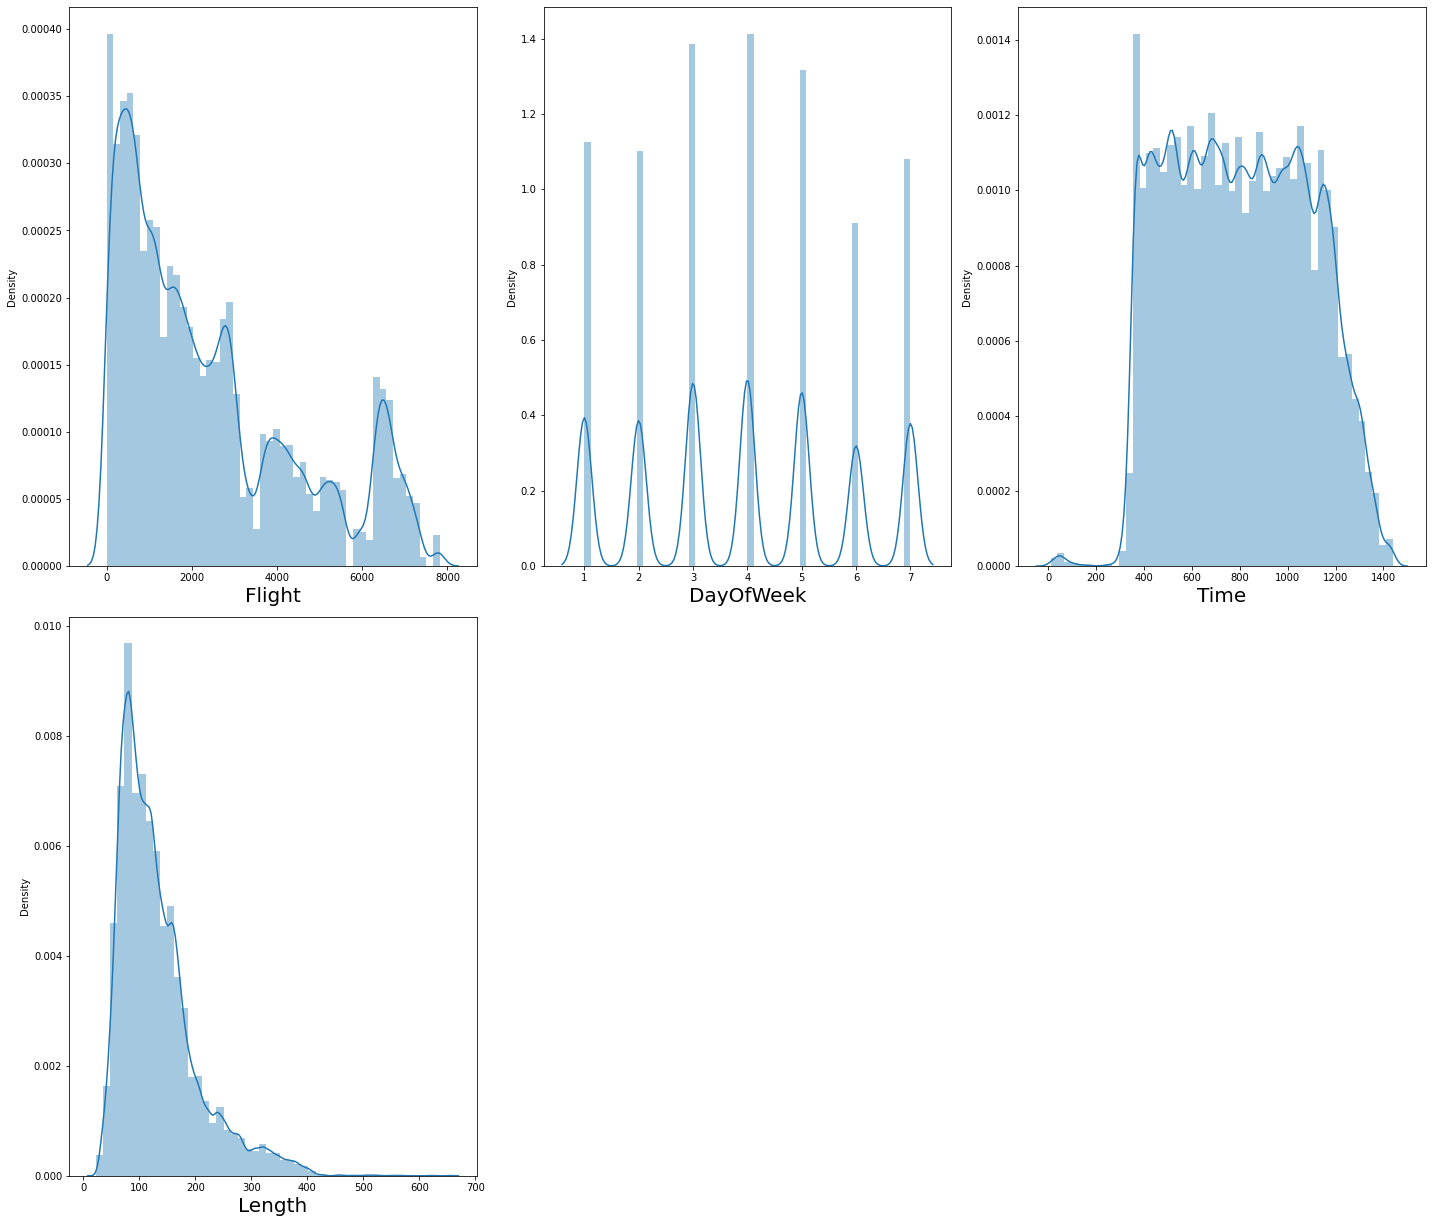

In [186]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

The time data looks to be resembling a normal distribution in a vague way, and the day of the week column is a numerical encoding thay represents days of the week, while also being fairly equally distributed.

Hence, we will check the skew for the remaining columns and try to transform them in a way that minimises the skew.

In [187]:
print("Skew for the Flight column : ", df['Flight'].skew())
print("Skew for the Length column : ", df['Length'].skew())

Skew for the Flight column :  0.8688884271425507
Skew for the Length column :  1.493965825038786


*Log Transform*

In [188]:
new_flight_log = np.log(x_df['Flight'])
new_length_log = np.log(x_df['Length'])


print("Skew for the log transformed Flight column : ", new_flight_log.skew())
print("Skew for the log transformed Length column : ", new_length_log.skew())

Skew for the log transformed Flight column :  -1.3192248064951917
Skew for the log transformed Length column :  0.17474949823180538


*Square root Tranform*

In [189]:
#new_flight_sqrt = np.sqrt(x_df['Flight'])
new_length_sqrt = np.sqrt(x_df['Length'])

#print("Skew for the log transformed Flight column : ", new_flight_sqrt.skew())
print("Skew for the log transformed Length column : ", new_length_sqrt.skew())

Skew for the log transformed Length column :  0.8137366172170706


It looks like the skew is minimised when we apply the log transform and sqaure root transform to the Flight and Time columns, respectively.

Hence, we apply these transformations to our data.

In [190]:
#x_df["Flight"] = np.sqrt(x_df['Flight'])
x_df["Length"] = np.log(x_df['Length'])

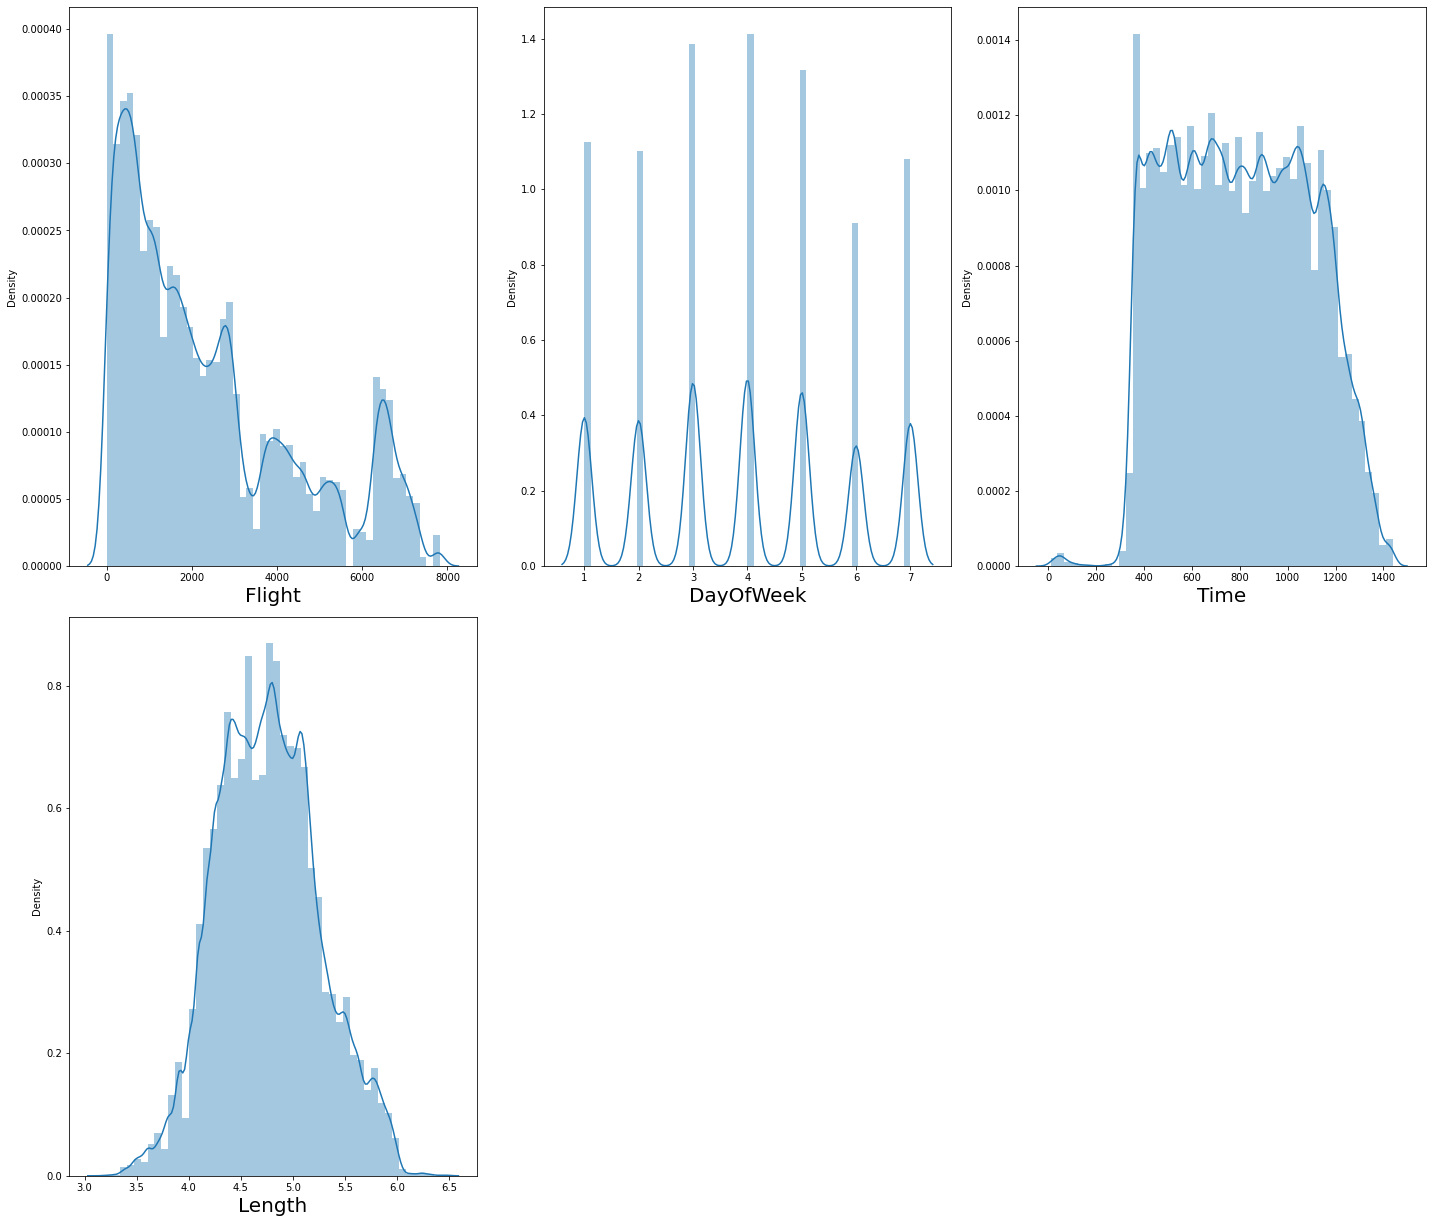

In [191]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

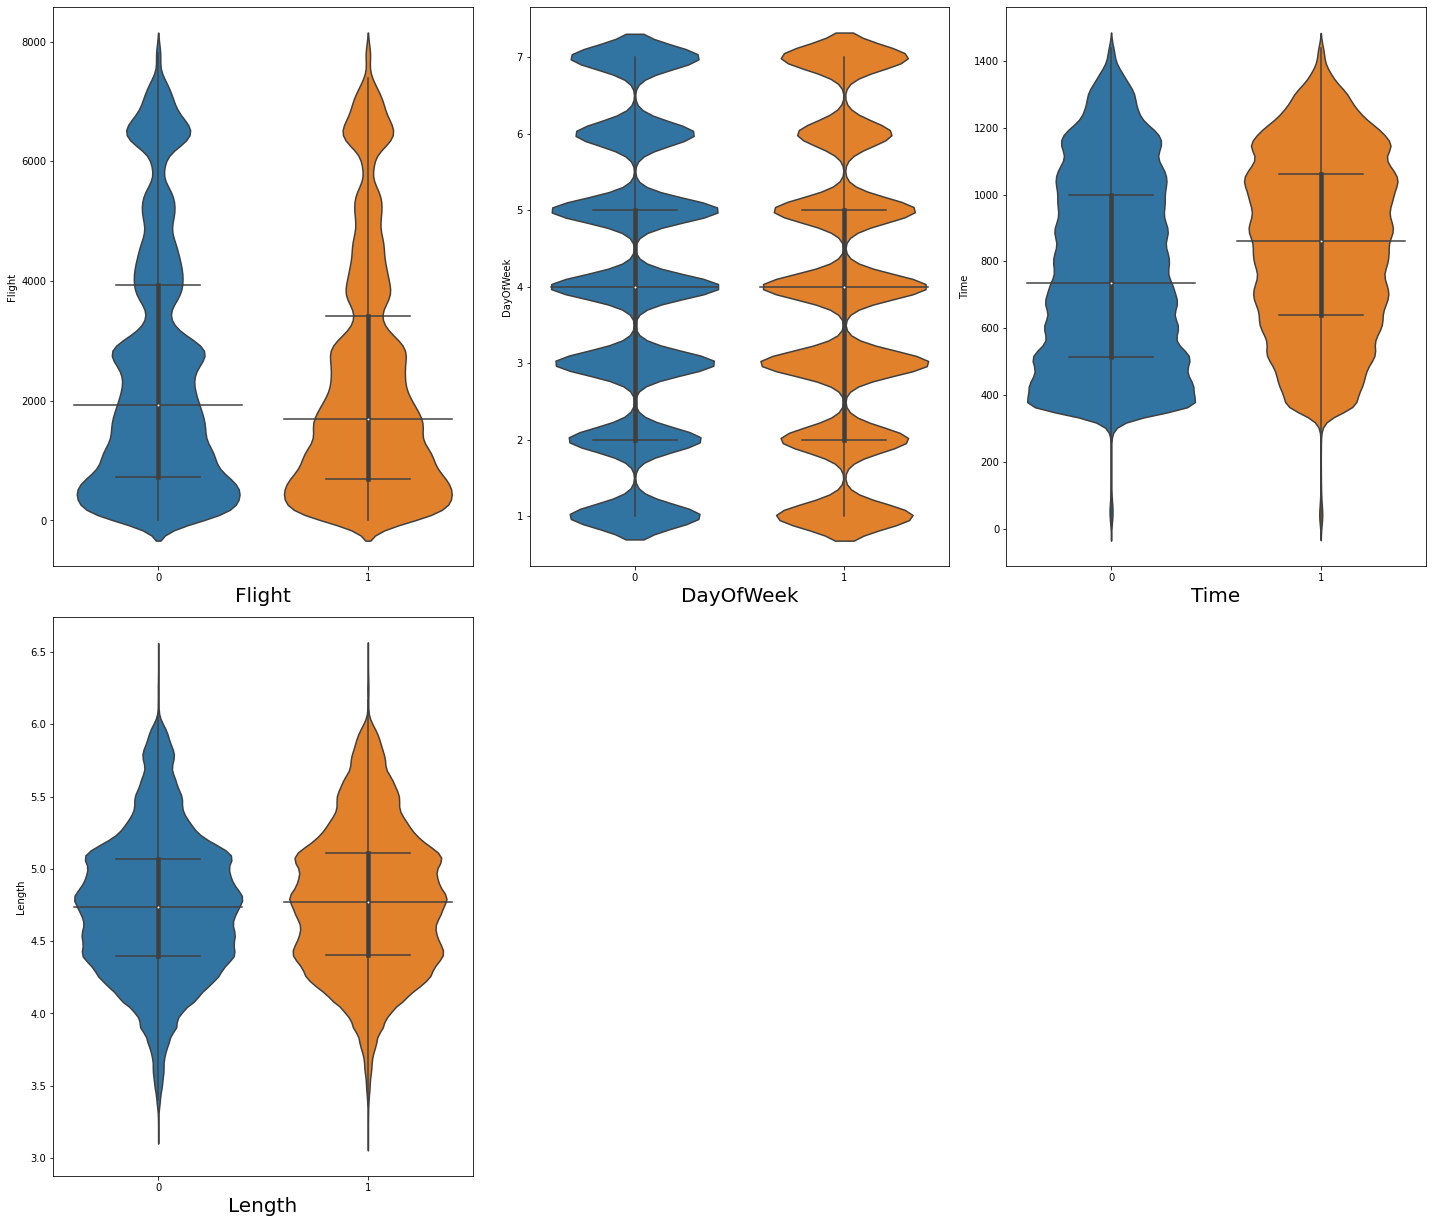

In [192]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numeric_data:
    if plotnumber<=16 :
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=y_df, y=column, data=x_df, showfliers=False, showbox=False, whis = [25, 75])
        sns.violinplot(y_df, x_df[column], )
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

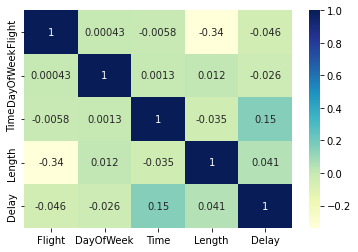

In [193]:
concat = pd.concat([x_df, y_df], axis = 1)

# plotting correlation heatmap
sns.heatmap(concat.corr(), cmap="YlGnBu", annot=True)


In [194]:
x_df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,CO,269,SFO,IAH,3,15,5.323010
1,US,1558,PHX,CLT,3,15,5.402677
2,AA,2400,LAX,DFW,3,20,5.105945
3,AA,2466,SFO,DFW,3,20,5.273000
4,AS,108,ANC,SEA,3,30,5.308268
...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,5.786897
539379,FL,398,SEA,ATL,5,1439,5.720312
539380,FL,609,SFO,MKE,5,1439,5.541264
539381,UA,78,HNL,SFO,5,1439,5.746203


# Label encoding

In [195]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()

x_df['Airline']= le1.fit_transform(x_df['Airline'])
x_df['AirportFrom']= le2.fit_transform(x_df['AirportFrom'])
x_df['AirportTo']= le3.fit_transform(x_df['AirportTo'])



In [196]:
print(le1.classes_, end = "\n\n")

['9E' 'AA' 'AS' 'B6' 'CO' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'OH' 'OO' 'UA'
 'US' 'WN' 'XE' 'YV']



In [197]:
print(le2.classes_, end = "\n\n")

['ABE' 'ABI' 'ABQ' 'ABR' 'ABY' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'ALB' 'AMA' 'ANC' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'AVP' 'AZO' 'BDL' 'BET'
 'BFL' 'BGM' 'BGR' 'BHM' 'BIL' 'BIS' 'BKG' 'BLI' 'BMI' 'BNA' 'BOI' 'BOS'
 'BQK' 'BQN' 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF' 'BUR' 'BWI' 'BZN' 'CAE'
 'CAK' 'CDC' 'CDV' 'CEC' 'CHA' 'CHO' 'CHS' 'CIC' 'CID' 'CLD' 'CLE' 'CLL'
 'CLT' 'CMH' 'CMI' 'CMX' 'COD' 'COS' 'COU' 'CPR' 'CRP' 'CRW' 'CSG' 'CVG'
 'CWA' 'CYS' 'DAB' 'DAL' 'DAY' 'DBQ' 'DCA' 'DEN' 'DFW' 'DHN' 'DLH' 'DRO'
 'DSM' 'DTW' 'EAU' 'ECP' 'EGE' 'EKO' 'ELM' 'ELP' 'ERI' 'EUG' 'EVV' 'EWN'
 'EWR' 'EYW' 'FAI' 'FAR' 'FAT' 'FAY' 'FCA' 'FLG' 'FLL' 'FLO' 'FNT' 'FSD'
 'FSM' 'FWA' 'GCC' 'GEG' 'GFK' 'GGG' 'GJT' 'GNV' 'GPT' 'GRB' 'GRK' 'GRR'
 'GSO' 'GSP' 'GTF' 'GTR' 'GUC' 'GUM' 'HDN' 'HLN' 'HNL' 'HOU' 'HPN' 'HRL'
 'HSV' 'HTS' 'IAD' 'IAH' 'ICT' 'IDA' 'ILM' 'IND' 'IPL' 'ISP' 'ITH' 'ITO'
 'IYK' 'JAC' 'JAN' 'JAX' 'JFK' 'JNU' 'KOA' 'KTN' 'LAN' 'LAS' 'LAX' 'LBB'
 'LCH' 'LEX' 'LFT' 'LGA' 'LGB' 'LIH' 'LIT' 'LMT' 'L

In [198]:
print(le3.classes_, end = "\n\n")

['ABE' 'ABI' 'ABQ' 'ABR' 'ABY' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX' 'AGS'
 'ALB' 'AMA' 'ANC' 'ASE' 'ATL' 'ATW' 'AUS' 'AVL' 'AVP' 'AZO' 'BDL' 'BET'
 'BFL' 'BGM' 'BGR' 'BHM' 'BIL' 'BIS' 'BKG' 'BLI' 'BMI' 'BNA' 'BOI' 'BOS'
 'BQK' 'BQN' 'BRO' 'BRW' 'BTM' 'BTR' 'BTV' 'BUF' 'BUR' 'BWI' 'BZN' 'CAE'
 'CAK' 'CDC' 'CDV' 'CEC' 'CHA' 'CHO' 'CHS' 'CIC' 'CID' 'CLD' 'CLE' 'CLL'
 'CLT' 'CMH' 'CMI' 'CMX' 'COD' 'COS' 'COU' 'CPR' 'CRP' 'CRW' 'CSG' 'CVG'
 'CWA' 'CYS' 'DAB' 'DAL' 'DAY' 'DBQ' 'DCA' 'DEN' 'DFW' 'DHN' 'DLH' 'DRO'
 'DSM' 'DTW' 'EAU' 'ECP' 'EGE' 'EKO' 'ELM' 'ELP' 'ERI' 'EUG' 'EVV' 'EWN'
 'EWR' 'EYW' 'FAI' 'FAR' 'FAT' 'FAY' 'FCA' 'FLG' 'FLL' 'FLO' 'FNT' 'FSD'
 'FSM' 'FWA' 'GCC' 'GEG' 'GFK' 'GGG' 'GJT' 'GNV' 'GPT' 'GRB' 'GRK' 'GRR'
 'GSO' 'GSP' 'GTF' 'GTR' 'GUC' 'GUM' 'HDN' 'HLN' 'HNL' 'HOU' 'HPN' 'HRL'
 'HSV' 'HTS' 'IAD' 'IAH' 'ICT' 'IDA' 'ILM' 'IND' 'IPL' 'ISP' 'ITH' 'ITO'
 'IYK' 'JAC' 'JAN' 'JAX' 'JFK' 'JNU' 'KOA' 'KTN' 'LAN' 'LAS' 'LAX' 'LBB'
 'LCH' 'LEX' 'LFT' 'LGA' 'LGB' 'LIH' 'LIT' 'LMT' 'L

In [199]:
x_df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,4,269,253,135,3,15,5.323010
1,14,1558,217,60,3,15,5.402677
2,1,2400,154,80,3,20,5.105945
3,1,2466,253,80,3,20,5.273000
4,2,108,14,252,3,30,5.308268
...,...,...,...,...,...,...,...
539378,4,178,203,264,5,1439,5.786897
539379,8,398,252,16,5,1439,5.720312
539380,8,609,253,184,5,1439,5.541264
539381,13,78,128,253,5,1439,5.746203


In [200]:
max(x_df["Time"])

1439

# Training

Let's just keep a bit of the data aside for testing purposes, shall we? Always nice to have a final check on a model, lest we unabashedly make a fool of ourselves.

In [201]:
from sklearn.model_selection import train_test_split
x_train, x_check, y_train, y_check = train_test_split(x_df, y_df, test_size = 0.10, random_state = 42)

In [202]:
x_val, x_test, y_val, y_test = train_test_split(x_check, y_check, test_size = 0.5, random_state = 42)

We will try multiple algorithms to find out the best fit

1. Logistic Regression

In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
lr_base = LogisticRegression(random_state = 0).fit(x_train, y_train)
el_score = []
el_mods = []
for i in range(0, 11):
  lr_elastic = LogisticRegression(random_state = 42).fit(x_train, y_train)
  el_mods.append(lr_elastic)
  el_score.append(lr_elastic.score(x_train, y_train))

In [205]:
print(lr_base.score(x_train, y_train))
print(el_mods)
print(el_score)

0.5771844570194936
[LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42), LogisticRegression(random_state=42)]
[0.5771844570194936, 0.5771844570194936, 0.5771844570194936, 0.5771844570194936, 0.5771844570194936, 0.5771844570194936, 0.5771844570194936, 0.5771844570194936, 0.5771844570194936, 0.5771844570194936, 0.5771844570194936]


2. Random Forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
clf_1 = RandomForestClassifier(max_depth=6, random_state=0)
clf_1.fit(x_train, y_train)
clf_1.score(x_train, y_train)

0.6356673622541154

In [208]:
from sklearn.metrics import accuracy_score
y_hat_val = clf_1.predict(x_val)
print(accuracy_score(y_hat_val, y_val))

0.6359523897808596


3. XGBoost

In [209]:
import xgboost as xgb

In [210]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", max_depth = 5, random_state=42)
xgb_model.fit(x_train, y_train)
print(xgb_model.score(x_train, y_train))

y_hat_val_xgb = xgb_model.predict(x_val)
print(accuracy_score(y_hat_val_xgb, y_val))

0.6693542572629836
0.6630205050242871


4. AdaBoost

In [211]:
from sklearn.ensemble import AdaBoostClassifier

In [212]:
clf_ada_1 = AdaBoostClassifier(n_estimators=200, learning_rate = 0.5, random_state=0)
clf_ada_1.fit(x_train, y_train)
print(clf_ada_1.score(x_train, y_train))

y_hat_val_ada = clf_ada_1.predict(x_val)
print(accuracy_score(y_hat_val_ada, y_val))

0.6430112001252469
0.6429975156661352


**The best model looks to be the Xgboost one, so we will predict the final test data output using this model.**

In [213]:
y_hat_test_xgb = xgb_model.predict(x_test)
print(accuracy_score(y_hat_test_xgb, y_test))

0.6646890874707998


In [214]:
xgb_model.save_model("airline_delay_xgb.json")
xgb_model.save_model("airline_delay_xgb.txt")

In [215]:
dump(xgb_model, 'model.joblib')
dump(clf_1, "rand_for.joblib")

['rand_for.joblib']